# Breast Cancer — Binary Classification



In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)


## 1. Load Dataset

In [67]:
data = load_breast_cancer()
X, y = data.data, data.target

## 2. Explore Dataset

In [68]:
print(X.shape)
print(data.target_names)
print(f"0={sum(y==0)}, 1={sum(y==1)}")

(569, 30)
['malignant' 'benign']
0=212, 1=357


In [69]:
df = pd.DataFrame(X, columns=data.feature_names)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


- **Shape:** 569 samples, 30 numerical features
- **Classes:** Malignant=212, Benign=357 → slight imbalance
  → used `stratify=y` in Train-Test Split
- **Feature scales vary significantly:**
  - mean area: up to 2501
  - mean smoothness: 0.05 to 0.16
  → scaling would help SVM and KNN,
     but NOT allowed in this task

## 3. Train-Test Split
Split 80% train / 20% test with stratify to preserve class ratio

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

## 4. Train Models


In [71]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

for model in models.values():
    model.fit(X_train, y_train)

## 5. Model Evaluation

In [72]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model'    : name,
        'Accuracy' : round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall'   : round(recall_score(y_test, y_pred), 4),
        'F1'       : round(f1_score(y_test, y_pred), 4)
    })

pd.DataFrame(results).set_index('Model')

,Accuracy,Precision,Recall,F1
Model,,,,
Logistic Regression,0.9649,0.9595,0.9861,0.9726
SVM,0.9298,0.9211,0.9722,0.9459
KNN,0.9123,0.9429,0.9167,0.9296


## 6. Confusion Matrix

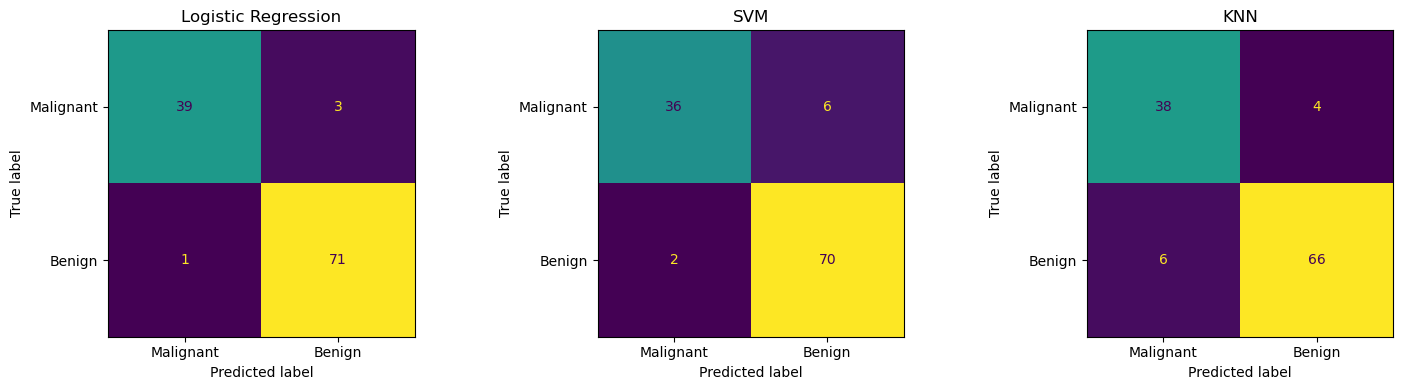

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, model) in zip(axes, models.items()):
    ConfusionMatrixDisplay(
        confusion_matrix(y_test, model.predict(X_test)),
        display_labels=['Malignant', 'Benign']
    ).plot(ax=ax, colorbar=False)
    ax.set_title(name)
plt.tight_layout()
plt.show()

## 7. Conclusion

### Best Model: Logistic Regression
| Model | Accuracy | Precision | Recall | F1 |
|-------|----------|-----------|--------|----|
| Logistic Regression | 0.9649 | 0.9595 | 0.9861 | 0.9726 |
| SVM | 0.9298 | 0.9211 | 0.9722 | 0.9459 |
| KNN | 0.9123 | 0.9429 | 0.9167 | 0.9296 |

### Why Logistic Regression?
- Highest F1 = 0.9726
- Highest Recall = 0.9861 ← most important in medical context
- Less affected by unscaled features compared to SVM and KNN

### Most Important Metric: Recall
In a medical context, missing a real cancer patient **(False Negative)**
is far more dangerous than a false alarm **(False Positive)**.
A high Recall means the model catches as many real cases as possible.

### Model Ranking
1. Logistic Regression ← Best
2. SVM
3. KNN ← Most affected by lack of scaling